<a href="https://colab.research.google.com/github/kn-neelalohitha/Learning-Deep-Learning/blob/master/DNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


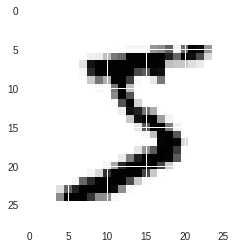

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(512, 3, 3, activation='relu', input_shape=(28,28,1))) # 28 -> 26
model.add(Convolution2D(512, 3, 3, activation='relu'))# 26 -> 24
model.add(Convolution2D(256, 3, 3, activation='relu'))# 24 -> 22
model.add(Convolution2D(256, 3, 3, activation='relu'))# 22 -> 20
model.add(Convolution2D(128, 3, 3, activation='relu'))#        18
model.add(Convolution2D(128, 3, 3, activation='relu'))# 16
model.add(Convolution2D(64, 3, 3, activation='relu'))# 14
model.add(Convolution2D(64, 3, 3, activation='relu'))# 12
model.add(Convolution2D(32, 3, 3, activation='relu'))# 10
model.add(Convolution2D(32, 3, 3, activation='relu'))# 8
model.add(Convolution2D(16, 3, 3, activation='relu'))# 6
model.add(Convolution2D(16, 3, 3, activation='relu'))# 4
model.add(Convolution2D(10, 3, 3, activation='relu'))# 2
model.add(Convolution2D(10, 1, 1, activation='relu'))# 2


model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 512)       5120      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 512)       2359808   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       1179904   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 128)       295040    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        73792     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.4603 - acc: 0.8543
Epoch 2/10
60000/60000 [==============================] - 370s 6ms/step - loss: 0.1321 - acc: 0.9639
Epoch 3/10
60000/60000 [==============================] - 371s 6ms/step - loss: 0.1011 - acc: 0.9722
Epoch 4/10
60000/60000 [==============================] - 534s 9ms/step - loss: 0.0817 - acc: 0.9784
Epoch 5/10
60000/60000 [==============================] - 641s 11ms/step - loss: 0.0750 - acc: 0.9803
Epoch 6/10
60000/60000 [==============================] - 601s 10ms/step - loss: 0.0663 - acc: 0.9819
Epoch 7/10
60000/60000 [==============================] - 524s 9ms/step - loss: 0.0620 - acc: 0.9838
Epoch 8/10
60000/60000 [==============================] - 522s 9ms/step - loss: 0.0613 - acc: 0.9836
Epoch 9/10
60000/60000 [==============================] - 522s 9ms/step - loss: 0.0527 - acc: 0.9860
Epoch 10/10
60000/60000 [================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.07480630030930042, 0.9807]


In [0]:
y_pred = model.predict(X_test)

In [17]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, initial_epoch = 10, verbose=1)

Epoch 11/20
60000/60000 [==============================] - 523s 9ms/step - loss: 0.0527 - acc: 0.9866
Epoch 12/20
60000/60000 [==============================] - 434s 7ms/step - loss: 0.0482 - acc: 0.9877
Epoch 13/20
60000/60000 [==============================] - 365s 6ms/step - loss: 0.0493 - acc: 0.9866
Epoch 14/20
60000/60000 [==============================] - 267s 4ms/step - loss: 0.0470 - acc: 0.9878
Epoch 15/20
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0442 - acc: 0.9883
Epoch 16/20
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0466 - acc: 0.9876
Epoch 17/20
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0448 - acc: 0.9881
Epoch 18/20
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0418 - acc: 0.9889
Epoch 19/20
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0445 - acc: 0.9883
Epoch 20/20
60000/60000 [==============================] - 212s 4ms/step - loss: 0

In [18]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 10s 1ms/step
[0.06337516024205833, 0.9853]


In [19]:
print(y_pred[:9])
print(y_test[:9])

[[2.11498462e-13 1.37371580e-06 8.75317437e-06 3.24141695e-07
  2.89617983e-08 7.68735242e-10 6.73276182e-17 9.99988794e-01
  3.46640702e-11 7.09342885e-07]
 [3.17666195e-06 2.14583224e-06 9.99427736e-01 3.96868883e-04
  3.24281646e-05 7.45472562e-07 1.05377643e-04 3.51705069e-07
  2.87664461e-05 2.30643150e-06]
 [6.94567681e-10 9.98112440e-01 4.60982010e-05 7.95648305e-07
  1.09499844e-03 6.12813630e-04 3.41186133e-05 7.62918280e-05
  1.18863991e-05 1.06356920e-05]
 [9.99167085e-01 9.37988830e-07 1.14200106e-04 1.09694362e-07
  2.16211856e-06 4.16114335e-06 6.13352982e-04 1.55801807e-08
  2.01116436e-05 7.77561436e-05]
 [3.42581852e-10 5.49760728e-07 7.33896357e-08 2.78862072e-10
  9.99884963e-01 7.73701014e-09 2.73884853e-05 3.33446269e-06
  2.91944684e-06 8.07395700e-05]
 [1.43822237e-11 9.99441922e-01 1.37726129e-05 8.53600639e-08
  3.88007320e-04 9.36674332e-05 4.43953013e-06 5.30963589e-05
  2.36682831e-06 2.59994317e-06]
 [1.96854657e-08 4.42853809e-04 1.70835610e-05 1.86464501e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

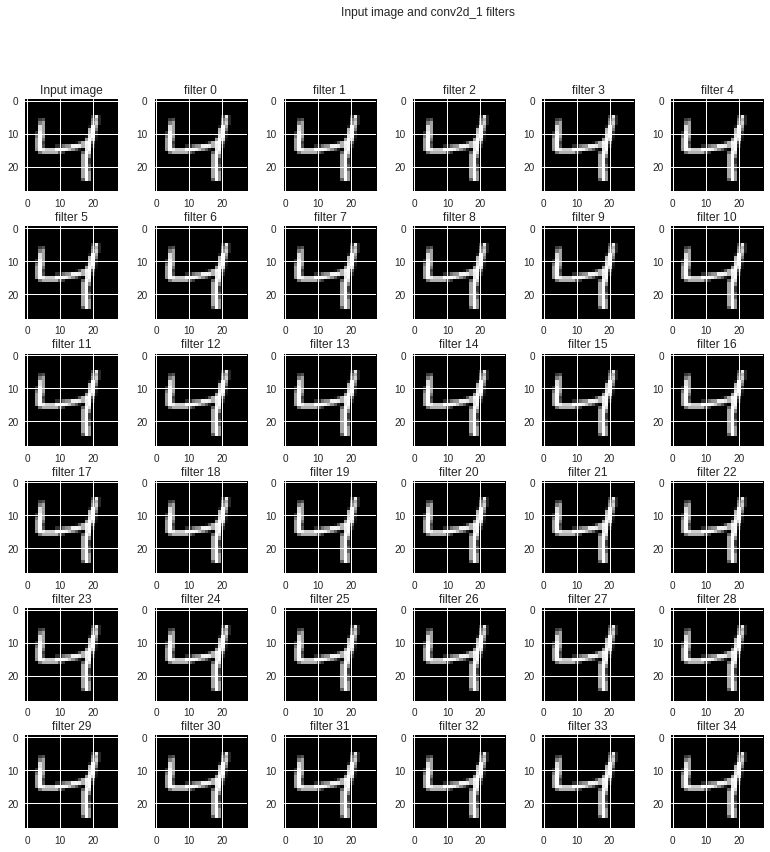

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()